In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models



In [73]:

# Load the dataset from the CSV file
dataset = pd.read_csv('dataset.csv')

# Drop the 'totacc', 'mov', and 'prob' columns from the dataset
dataset = dataset.drop(['totacc', 'mov', 'prob'], axis=1)

# Create a new DataFrame with the remaining columns
df = pd.DataFrame(dataset)

# Print the first five rows of the new DataFrame
df.head()



,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,status
0,1682170879371,-8.179,-4.225,2.850,1.89,-1.19,0.35,26.002,-70.788,0.005371,0
1,1682170879475,-8.270,-4.306,2.692,0.63,0.00,0.84,26.342,-71.969,0.006592,0
2,1682170879580,-8.112,-4.376,2.881,0.77,-0.14,-0.07,26.944,-70.446,0.018799,0
3,1682170879684,-8.169,-4.321,2.972,0.14,-0.49,0.70,26.428,-70.007,0.036377,0
4,1682170879789,-8.203,-4.323,2.850,-0.84,0.35,1.26,26.465,-70.840,0.045654,0


In [74]:
## SCALING ##
# Select all columns except the last one
cols_to_scale = df.columns[:-1]

# Apply the StandardScaler to the selected columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_to_scale]), columns=cols_to_scale)

# Concatenate the scaled columns with the last column (not scaled)
df_scaled = pd.concat([df_scaled, df.iloc[:, -1]], axis=1)

df_scaled.describe()

,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,status
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000
mean,-3.592195e-09,1.993666e-17,1.435440e-16,-1.594933e-17,-3.488916e-18,9.968332e-18,-6.977833e-18,-1.116453e-16,6.379733e-17,-1.913920e-16,0.460157
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.498690
min,-1.725883e+00,-1.373041e+00,-2.919185e+00,-3.102695e+00,-6.289823e+00,-3.402293e+00,-3.000310e+00,-3.528872e+00,-1.799053e+00,-1.645770e+00,0.000000
25%,-8.648394e-01,-7.556208e-01,-5.232850e-01,-6.727552e-01,-4.059308e-01,-3.426450e-01,-3.181327e-01,-5.180089e-01,-5.896151e-01,-7.085493e-01,0.000000
50%,-2.484768e-03,-6.239950e-01,2.081422e-01,2.312221e-01,3.231456e-02,-1.213590e-01,-3.895060e-02,-1.582567e-01,-5.110273e-01,-2.347073e-01,0.000000
75%,8.649500e-01,8.403982e-01,5.235134e-01,4.870425e-01,3.833581e-01,5.972936e-01,2.291035e-01,5.869976e-01,9.889580e-01,5.425728e-01,1.000000
max,1.733222e+00,2.252473e+00,5.480591e+00,3.636345e+00,8.129234e+00,3.001092e+00,2.825530e+00,2.720017e+00,2.290458e+00,3.200273e+00,1.000000


In [75]:
#df_scaled = df

In [76]:
# Separate the features from the target variable
X = df_scaled.drop(['status'], axis=1).values
y = df_scaled['status'].values

# Convert the target variable to binary values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for use in a CNN
input_shape = (X_train.shape[1], 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
45/45 [==============================] - 3s 11ms/step - loss: 0.6501 - accuracy: 0.5885 - val_loss: 0.5880 - val_accuracy: 0.7709
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 0.5259 - accuracy: 0.8216 - val_loss: 0.5126 - val_accuracy: 0.8101
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.8581 - val_loss: 0.4609 - val_accuracy: 0.8324
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8581 - val_loss: 0.4285 - val_accuracy: 0.8324
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3502 - accuracy: 0.8750 - val_loss: 0.4113 - val_accuracy: 0.8324
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3226 - accuracy: 0.8764 - val_loss: 0.4030 - val_accuracy: 0.8492
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3047 - accuracy: 0.8848 - val_loss: 0.3986 - val_accuracy: 0.8547
Epoch 8/10
45/45 [=

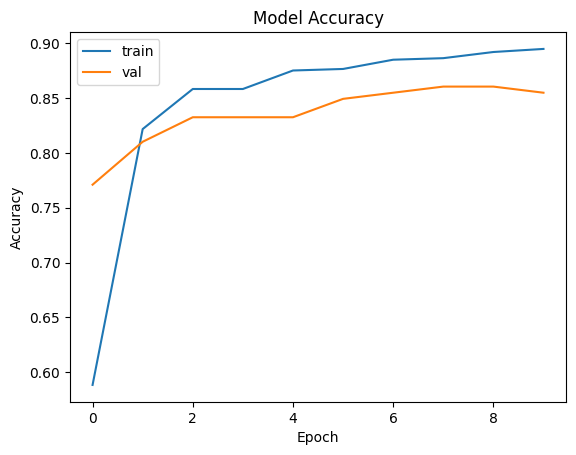

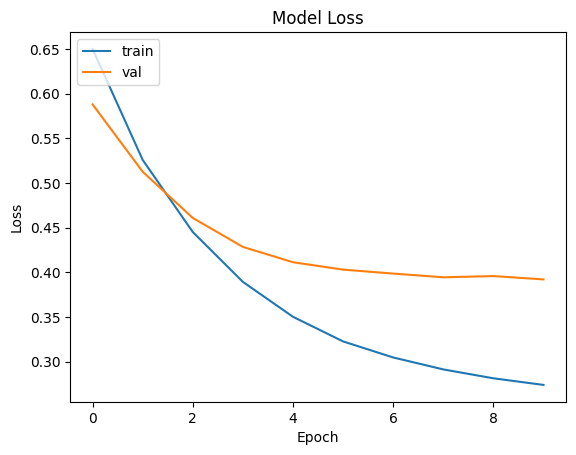

In [77]:

# plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


6/6 [==============================] - 0s 11ms/step


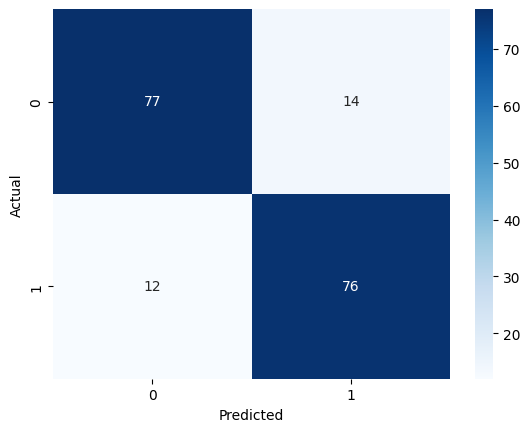

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [79]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 0.01
    if epoch > 5:
        lr = 0.001
    if epoch > 10:
        lr = 0.0001
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


Epoch 1/20
45/45 [==============================] - 2s 14ms/step - loss: 0.2739 - accuracy: 0.8834 - val_loss: 0.3799 - val_accuracy: 0.8771 - lr: 0.0100
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.2336 - accuracy: 0.9143 - val_loss: 0.3670 - val_accuracy: 0.8883 - lr: 0.0100
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.2054 - accuracy: 0.9256 - val_loss: 0.3498 - val_accuracy: 0.8659 - lr: 0.0100
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1914 - accuracy: 0.9256 - val_loss: 0.3989 - val_accuracy: 0.8771 - lr: 0.0100
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1715 - accuracy: 0.9452 - val_loss: 0.3849 - val_accuracy: 0.8827 - lr: 0.0100
Epoch 6/20
45/45 [==============================] - 0s 5ms/step - loss: 0.1721 - accuracy: 0.9480 - val_loss: 0.3369 - val_accuracy: 0.9050 - lr: 0.0100
Epoch 7/20
45/45 [==============================] - 1s 14ms/step - loss: 0.1461 -

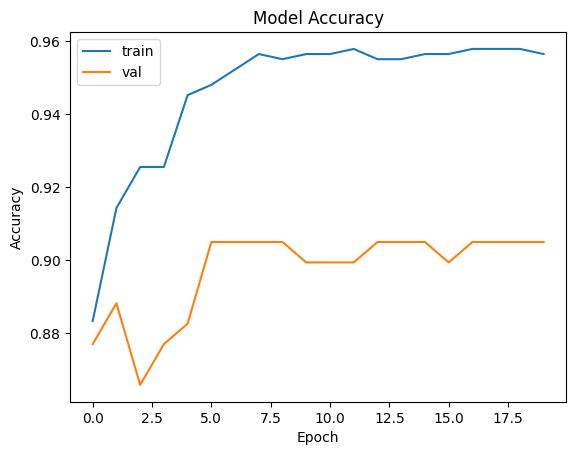

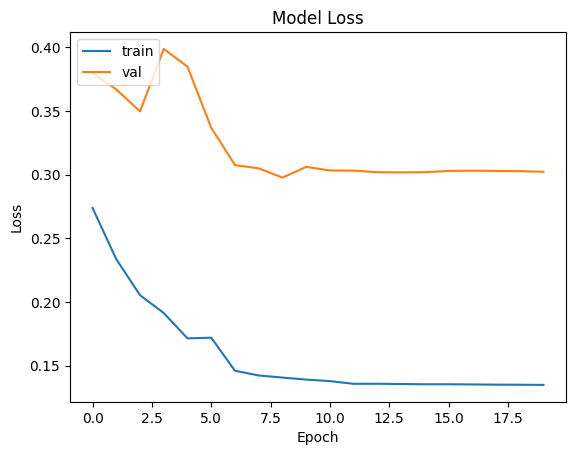

In [80]:
# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

